# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I would define profit as equal to (price - cost) * quantity sold. So the most profitable item would have the greatest value as defined by said equation.

In [127]:
# Set up environment
import pandas as pd
import numpy as np

iowa_raw = "/Users/hmillspaugh/DS5030_Uncert/data/iowa.csv"

df_iowa = pd.read_csv(iowa_raw)

df_iowa.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [ ]:
# Take a peek
df_iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [ ]:
# Compute profit-related columns
df_iowa['Profit per Bottle'] = df_iowa['State Bottle Retail'] - df_iowa['State Bottle Cost']

df_iowa['Total Profit'] = df_iowa['Bottles Sold'] * df_iowa['Profit per Bottle']

df_iowa.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)', 'Profit per Bottle', 'Total Profit'],
      dtype='object')

In [ ]:
# Summarize profit data
profit_summary = (
    df_iowa.groupby("Item Description", as_index=False)
           .agg({"Total Profit": "sum"})
           .sort_values(by="Total Profit", ascending=False)
)

profit_summary.describe()

,Total Profit
count,5401.000000
mean,1453.044857
std,9317.029516
min,-32.500000
25%,38.940000
50%,122.500000
75%,477.480000
max,364074.350000


In [ ]:
# Display top 10 items by total profit
top10 = profit_summary.head(10)

top10

,Item Description,Total Profit
5022,TITOS HANDMADE VODKA,364074.35
636,BLACK VELVET,274676.85
1854,FIREBALL CINNAMON WHISKEY,187535.22
1323,CROWN ROYAL,160981.95
1358,CROWN ROYAL REGAL APPLE,122880.40
1022,CAPTAIN MORGAN SPICED RUM,121115.30
2349,HAWKEYE VODKA,116375.04
992,CAPTAIN MORGAN ORIGINAL SPICED,112146.71
2564,JACK DANIELS OLD #7 BLACK LABEL,111509.09
2376,HENNESSY VS,108459.45


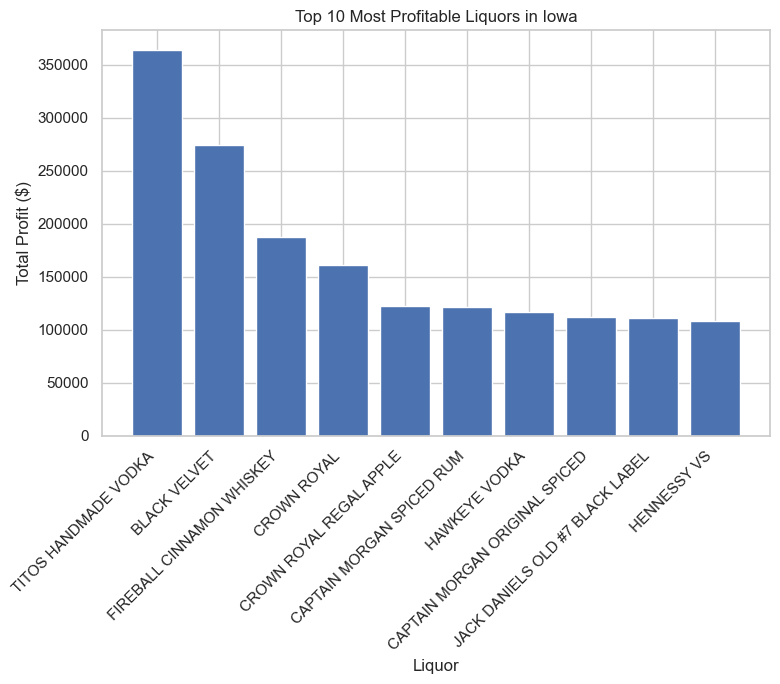

In [128]:
# Plot top 10 most profitable liquors
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
plt.bar(top10["Item Description"], top10["Total Profit"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Liquor")
plt.ylabel("Total Profit ($)")
plt.title("Top 10 Most Profitable Liquors in Iowa")

plt.tight_layout()
plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [131]:
# Initialize x and y 
x = np.array([1,3,5])
y = np.array([2,5])

In [111]:
# with x as row vector and y as column vector
x.reshape(1,-1)-y.reshape(-1,1)

array([[-1,  1,  3],
       [-4, -2,  0]])

In [112]:
# with x as column vector and y as row vector
x.reshape(-1,1)-y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

Explanation: x.reshape(1,-1) reshapes the array as an array with one row and columns equal to the length of the initial array and x.reshape(-1,1) does the opposite, transforming it such that there is one column and rows equal to the length of the initial array. In other words, x.reshape(1,-1) creates a row vector and x.reshape(-1,1) a column one. 

In [113]:
# with x as column vector and y as row vector
arr = []

for i in range(len(x)):
    row = []
    for j in range(len(y)):
        row.append(x[i] - y[j])
    arr.append(row)

arr = np.array(arr)
print(arr)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


In [114]:
# with x as row vector and y as column vector
arr = []

for i in range(len(y)):
    row = []
    for j in range(len(x)):
        row.append(x[j] - y[i])
    arr.append(row)

arr = np.array(arr)
print(arr)

[[-1  1  3]
 [-4 -2  0]]


3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

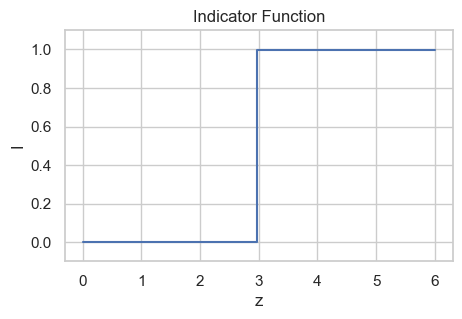

In [115]:
# Fix x
x = 3

# Creare
z = np.linspace(0, 6, 100)

# Indicator function
indicator = np.where(x <= z, 1, 0)

# Plot
plt.figure(figsize=(5, 3))
plt.step(z, indicator)
plt.title('Indicator Function')
plt.xlabel('z')
plt.ylabel('I')
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.show()

For the second part, both I(x >= z) and I(x < z) cannot both be true or false. 

1. I(x >= z) is true implies I(x < z) is false

2. I(x >= z) is false implies I(x < z) is true

So for condition 1,
    1 - (1) = (0) 

and for condition 2, 
    1 - (0) = (1)

both these conditions satisfy the equation listed above.


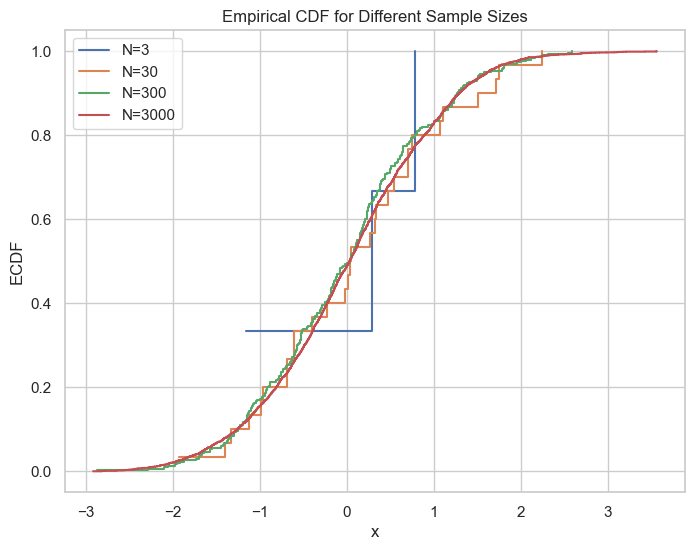

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  # nicer plots

rng = np.random.default_rng(100)

#  ECDF function for arrays
def ecdf(x, plot=True, label=None): #add label
    Z = np.sort(np.unique(x))  # sorted unique values
    compare = x.reshape(-1,1) <= Z.reshape(1,-1)  # compare all x to all Z
    ecdf_vals = np.mean(compare, axis=0)          # proportion <= each Z

    if plot:
        plt.step(Z, ecdf_vals, where='post', label=label)

    return ecdf_vals, Z

# Generate and plot ECDFs for different N
plt.figure(figsize=(8,6))

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)
    ecdf_vals, Z = ecdf(X, plot=True, label=f'N={N}') #add label

plt.xlabel('x')
plt.ylabel('ECDF')
plt.title('Empirical CDF for Different Sample Sizes')
plt.legend()
plt.show()


Explanation: As the sample n increases, the ecdf smooths out and becomes a better approximation of distribution. 

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [117]:
def my_quantile(x, q):
    """
    Compute the q-th quantile of the data in x.
    """

    # Convert input to a 1D NumPy array
    x = np.asarray(x).flatten()
    
    x_sorted = np.sort(x) # Sort the data
    index = int(q * (len(x_sorted) - 1)) # Compute the index
    return x_sorted[index] # Return the q-th quantile

In [118]:
def compute_iqr_whiskers(data):
    """
    Compute the interquartile range (IQR) and whiskers for a given dataset.
    
    Parameters:
    data (array-like): Input data.
    
    Returns:
    tuple: (Q1, Q3, IQR, lower_whisker, upper_whisker)
    """
    Q1 = my_quantile(data, 0.25) # Use my_quantile function to compute .25 quantile
    Q3 = my_quantile(data, 0.75) # Computes .75 quantile 
    IQR = Q3 - Q1 # Interquartile range (returns int)
    low_whisker = Q1 - 1.5 * IQR # Lower whisker
    up_whisker = Q3 + 1.5 * IQR # Upper whisker
    return Q1, Q3, IQR, low_whisker, up_whisker

In [119]:
def five_number_summary(data):
    """
    Compute the five-number summary of the data.
    
    Parameters:
    data (array-like): Input data.
    
    Returns:
    dict: A dictionary containing min, Q1, median, Q3, and max.
    """
    minimum = np.min(data) # Minimum value
    Q1 = my_quantile(data, 0.25) # First quartile
    median = my_quantile(data, 0.5) # Median
    Q3 = my_quantile(data, 0.75) # Third quartile
    maximum = np.max(data) # Maximum value

    return {'min': minimum, 'Q1': Q1, 'median': median, 'Q3': Q3, 'max': maximum}


In [120]:
def compute_outliers(data):
    """
    Identify outliers in the data using the 1.5*IQR rule.
    
    Parameters:
    data (array-like): Input data.
    
    Returns:
    list: A list of outlier values.
    """
    Q1, Q3, IQR, lower_whisker, upper_whisker = compute_iqr_whiskers(data)
    outliers = [x for x in data if x < lower_whisker or x > upper_whisker] # Identify outliers using list comprehension
    return outliers


In [121]:
df_iowa['Total Profit'].describe()

count    159904.000000
mean         49.078793
std         153.467941
min        -543.000000
25%          12.180000
50%          26.220000
75%          51.000000
max       12240.000000
Name: Total Profit, dtype: float64

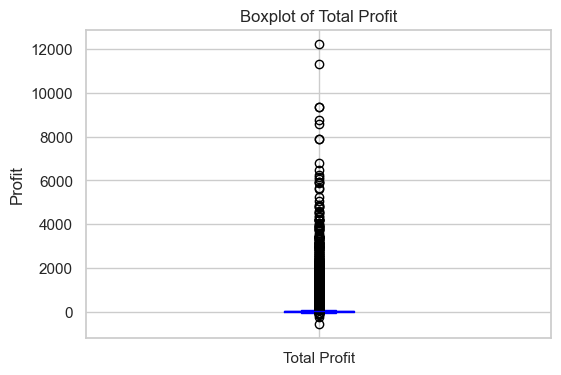

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df_iowa['Total Profit'].plot.box(color='blue', vert=True)
plt.title('Boxplot of Total Profit')
plt.ylabel('Profit')
plt.show()

In [123]:
print("Outliers:", compute_outliers(df_iowa['Total Profit']))

Outliers: [157.79999999999998, 265.5, 360.0, 139.20000000000002, 110.04000000000002, 414.0, 131.99999999999994, 198.0, 125.76, 222.0, 156.9, 119.76, 600.0, 114.0, 525.0, 556.92, 147.00000000000006, 219.66000000000003, 179.99999999999994, 133.79999999999998, 255.0, 1763.9999999999998, 132.24000000000004, 179.88, 161.28000000000003, 150.00000000000006, 225.0, 144.71999999999994, 313.8, 121.5, 114.0, 630.0, 162.0, 277.4399999999999, 183.00000000000006, 270.72, 138.0, 160.07999999999996, 164.16, 119.94000000000001, 315.0, 113.4, 132.0, 132.24, 124.08, 168.0, 180.0, 268.2, 322.2000000000001, 189.0, 188.28000000000003, 228.0, 120.0, 1710.0, 179.52000000000004, 156.60000000000005, 420.0, 224.88000000000002, 120.0, 132.00000000000006, 114.0, 188.88000000000002, 144.71999999999994, 153.0, 179.99999999999994, 3138.0000000000005, 123.0, 340.2000000000001, 2970.0, 163.07999999999998, 206.99999999999994, 128.16, 126.0, 125.52000000000001, 203.04000000000002, 281.76, 283.32, 1050.0, 124.019999999999

In [124]:
print("Five-number summary:", five_number_summary(df_iowa['Total Profit']))

Five-number summary: {'min': np.float64(-543.0), 'Q1': np.float64(12.180000000000003), 'median': np.float64(26.219999999999995), 'Q3': np.float64(51.0), 'max': np.float64(12240.0)}


In [125]:
print("Interquartile range and whiskers:", compute_iqr_whiskers(df_iowa['Total Profit']))

Interquartile range and whiskers: (np.float64(12.180000000000003), np.float64(51.0), np.float64(38.81999999999999), np.float64(-46.04999999999998), np.float64(109.22999999999999))


In [126]:
q = 0.5 # Set to median to test
print(f"Quantile set to {q}:", my_quantile(x, q))

Quantile set to 0.5: 3


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?